In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("homeprices.csv")
data



,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
...,...,...
71,3500,655000
72,3700,680000
73,4000,735000
74,4350,795000


In [7]:
X = data['area'].values
y = data['price'].values

In [8]:
X_scale = (X - np.mean(X)) / np.std(X)

def normalize(X, y):
    X_mean = np.mean(X)
    X_std = np.std(X)
    X_norm = (X - X_mean) / X_std
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_norm = (y - y_mean) / y_std
    return X_norm, y_norm, X_mean, X_std, y_mean, y_std

X_norm, y_norm, X_mean, X_std, y_mean, y_std = normalize(X, y)

In [9]:
m = 0
c = 0

def cost_function(X, y, m, c):
    return np.sum((m * X + c - y) ** 2) / (2 * len(X))

def gradient_descent(X, y, m, c, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        m_gradient = np.sum((m * X + c - y) * X) / len(X)
        c_gradient = np.sum(m * X + c - y) / len(X)
        m -= learning_rate * m_gradient
        c -= learning_rate * c_gradient
        cost_history.append(cost_function(X, y, m, c))
    return m, c, cost_history

learning_rate = 0.01
iterations = 1000

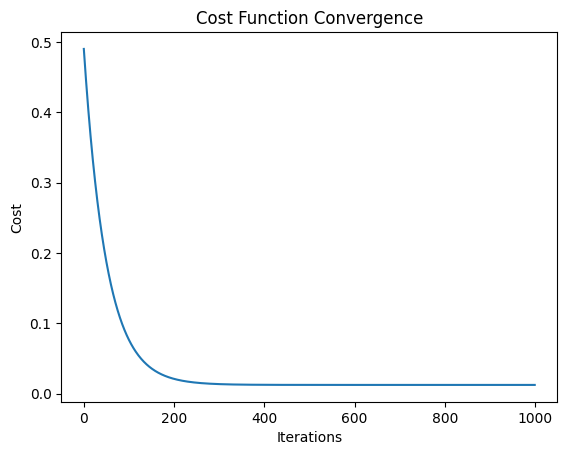

Optimized Slope (m): 0.9876040527266416
Optimized Intercept (c): 9.438794775013824e-16


In [10]:
m_optimized, c_optimized, cost_history = gradient_descent(X_scaled, y_norm, m, c, learning_rate, iterations)

plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

print("Optimized Slope (m):", m_optimized)
print("Optimized Intercept (c):", c_optimized)